# One Acre Fund: Loan Performance Analysis

Analysis of loan performance data focusing on repayment rates, portfolio composition, and key performance indicators.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Setup imports and configuration
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys
import os

# Add parent directory to Python path for imports
current_dir = Path(os.getcwd())
if current_dir.name == 'src':
    project_dir = current_dir.parent
else:
    project_dir = current_dir
sys.path.append(str(project_dir))

from src import analysis

# Set style for plots
plt.style.use('seaborn-v0_8')

In [28]:
# Load and preprocess the data
raw_data = analysis.load_data("../data/raw/training_loan_processed.csv")
df = analysis.preprocess_data(raw_data)
df.head(10)

,client_id,Loan_Type,region,duka_name,cumulative_amount_paid,nominal_contract_value,deposit_amount,contract_start_date,area,sales_territory,...,month,months_since_start,days_since_start,days_diff_contract_start_to_sept_23,days_diff_contract_start_to_nov_23,month_diff_contract_start_to_sept_23,month_diff_contract_start_to_nov_23,diff_nov_23_to_sept_23_repayment_rate,contract_start_day,contract_day_name
0,206a00541b2d03a61786f2f7880f5e0a98854ef67be07d...,Group Loan,Upper Western,Luuya,5383.287252,5383.287252,576.986844,2023-03-01,UW10,Sales Territory 189,...,2023-03,1.900000,57,184,245,6.133333,8.166667,0.182744,1,Wednesday
1,b2fa984220bcdc664c185a776b4f42f12af27b689bd5be...,Group Loan,Lower Western,Majengo,1710.141496,1952.411541,610.764820,2023-02-25,LW12,Sales Territory 119,...,2023-02,1.766667,53,188,249,6.266667,8.300000,0.563087,25,Saturday
2,91e017583615b0d0c1f66b3a9cfd6abc8dce0050cd7d2c...,Group Loan,Nyanza,Bomet,1273.739414,5256.271151,1081.842238,2023-02-11,NZ12,Sales territory 949,...,2023-02,1.300000,39,202,263,6.733333,8.766667,0.036079,11,Saturday
3,19289e32292c7268a092df4c8f529d8a3716f94012b077...,Individual Loan,Nyanza,Nyakongo,270.032839,806.240904,192.880599,2023-01-06,NZ10,Sales Territory 943,...,2023-01,0.100000,3,238,299,7.933333,9.966667,0.033254,6,Friday
4,35f9a64a0d421171d5ad07c3441ddd3e7db87492099be6...,Group Loan,Upper Western,Bokoli,11665.127080,11665.127080,1950.690148,2023-02-02,UW10,Sales Territory 747,...,2023-02,1.000000,30,211,272,7.033333,9.066667,0.124618,2,Thursday
5,c5ef006b4449e01f33b9b182b93757b2b380948cf6de15...,Group Loan,Lower Western,Butula,5862.196283,10837.349710,3625.305596,2023-01-27,LW7,Sales Territory 377,...,2023-01,0.800000,24,217,278,7.233333,9.266667,0.071174,27,Friday
6,05eceaa1ff922e89fe5b10d4e7770eb0d6988efe8769c9...,Group Loan,Lower Western,Buhuru,1757.536936,2760.165093,359.828419,2023-01-17,LW9,Sales Territory 167,...,2023-01,0.466667,14,227,288,7.566667,9.600000,0.506386,17,Tuesday
7,6e9f7d94fdedbc34d57676d92396f96fe7bbde49b3aa90...,Group Loan,Nyanza,Ranen,324.634262,11832.269570,324.634262,2023-03-01,NZ4,Sales Territory 284,...,2023-03,1.900000,57,184,245,6.133333,8.166667,0.000000,1,Wednesday
8,5b6d3c2ffddc1e46afec63d18edc3812b38a4d52a05f4e...,Group Loan,Upper Western,Namwela,10219.189740,10219.189740,1694.323264,2023-02-21,UW8,Sales Territory 159,...,2023-02,1.633333,49,192,253,6.400000,8.433333,0.378967,21,Tuesday
9,572d326a5c035bd92d1b3193ca483667361908d160040a...,Group Loan,Nyanza,Keroka,3003.581560,3003.581560,601.920152,2023-02-03,NZ10,Sales Territory 142,...,2023-02,1.033333,31,210,271,7.000000,9.033333,0.278557,3,Friday


In [4]:
# Calculate and display key summary statistics
stats = analysis.get_summary_statistics(df)

print("\nKey Portfolio Metrics:")
print(f"Total Loans: {stats['loan_count']:,}")
print(f"Average Loan Value: KES {stats['avg_loan_value']:,.0f}")
print(f"Median Loan Value: KES {stats['median_loan_value']:,.0f}")
print(f"\nRepayment Performance:")
print(f"Average Rate: {stats['avg_repayment_rate']:.1%}")
print(f"Target Achievement: {stats['target_achievement_rate']:.1%}")
print(f"Median Deposit Ratio: {stats['median_deposit_ratio']:.1%}")

print("\nPortfolio Composition:")
for loan_type, count in stats['loan_type_counts'].items():
    print(f"- {loan_type}: {count:,} loans")


Key Portfolio Metrics:
Total Loans: 36,215
Average Loan Value: KES 4,029
Median Loan Value: KES 3,094

Repayment Performance:
Average Rate: 48.9%
Target Achievement: 0.8%
Median Deposit Ratio: 20.9%

Portfolio Composition:
- Group Loan: 34,056 loans
- Individual Loan: 2,158 loans
- Paygo Loan: 1 loans


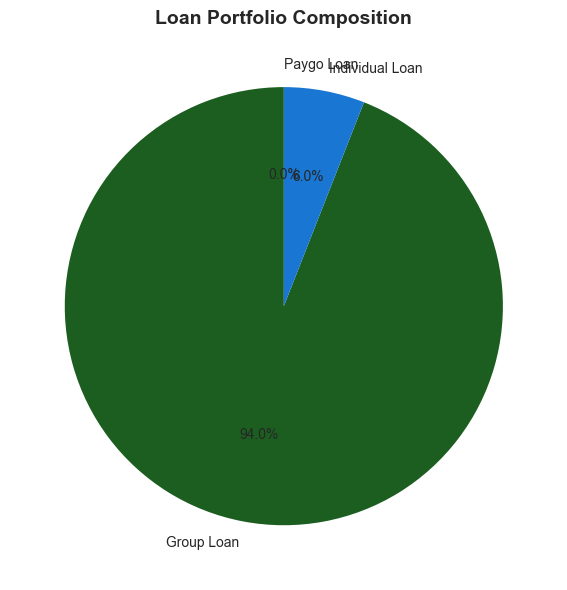

In [10]:
# Visualize loan portfolio composition
fig = analysis.plot_loan_portfolio_composition(df)
plt.tight_layout()
plt.show()

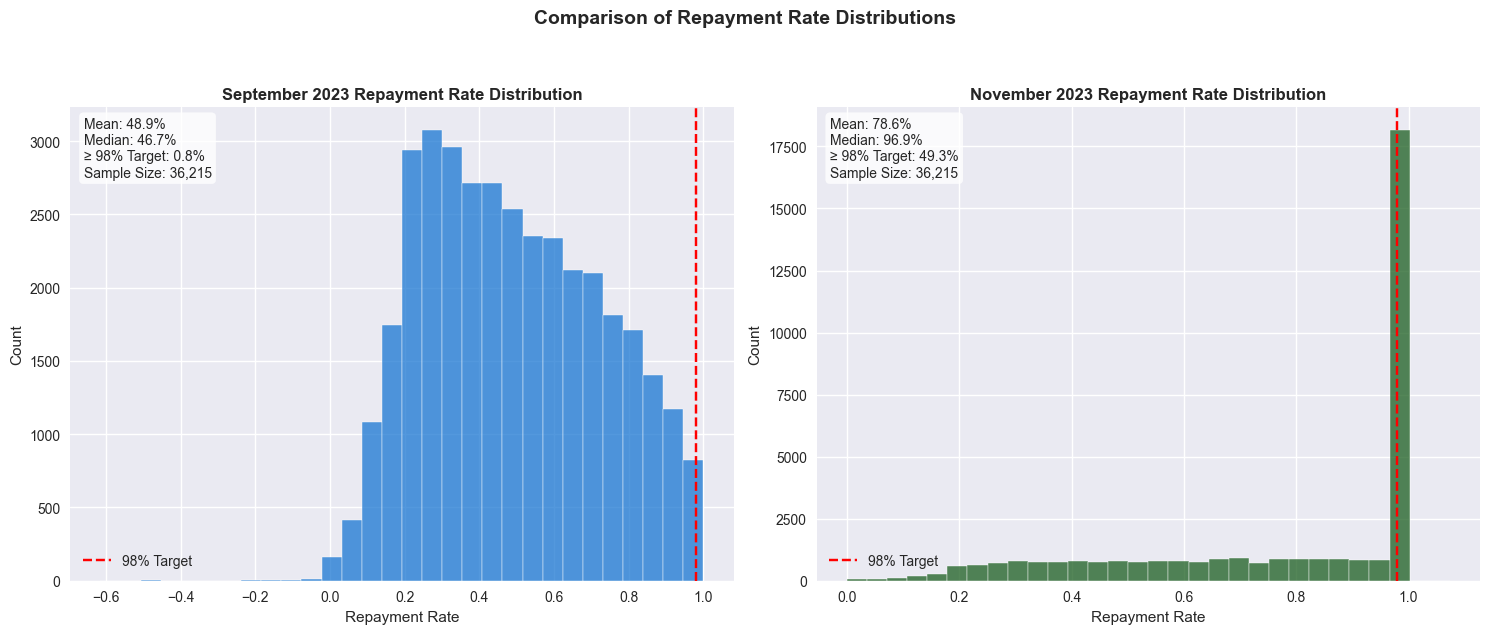

In [13]:
# Analyze repayment rate distribution
fig = analysis.plot_repayment_distribution_comparison(df)
plt.tight_layout()
plt.show()

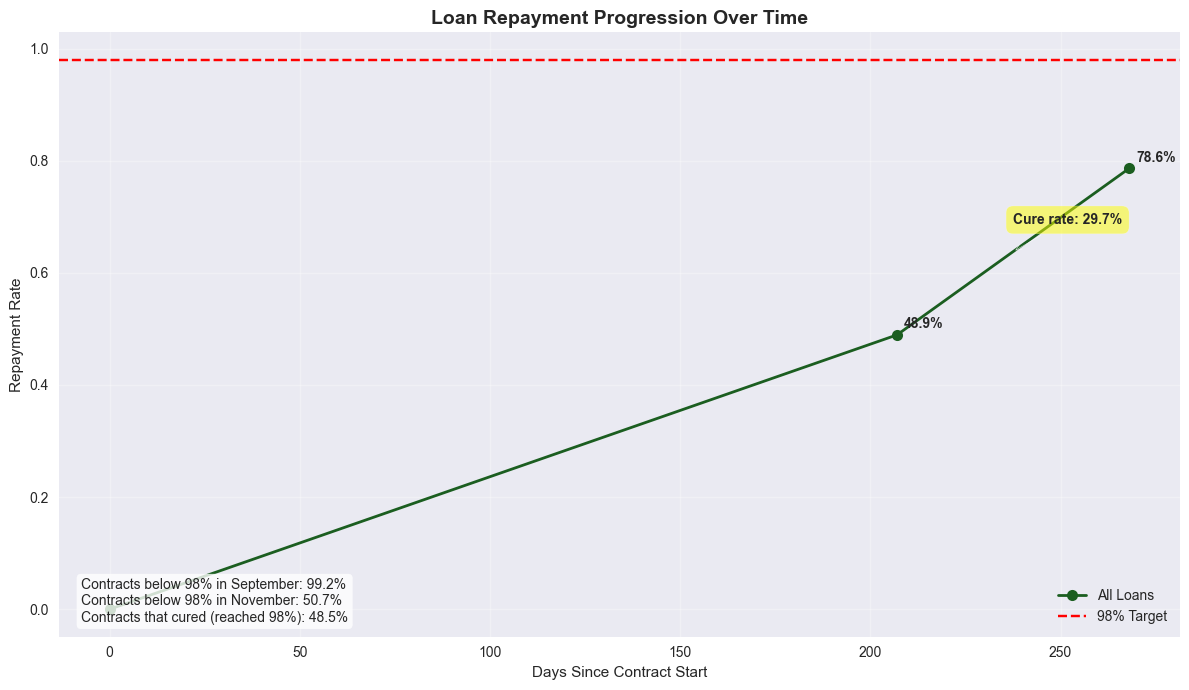

In [ ]:
# Analyze repayment rate curve
fig = analysis.plot_repayment_curve(df)
plt.tight_layout()
plt.show()

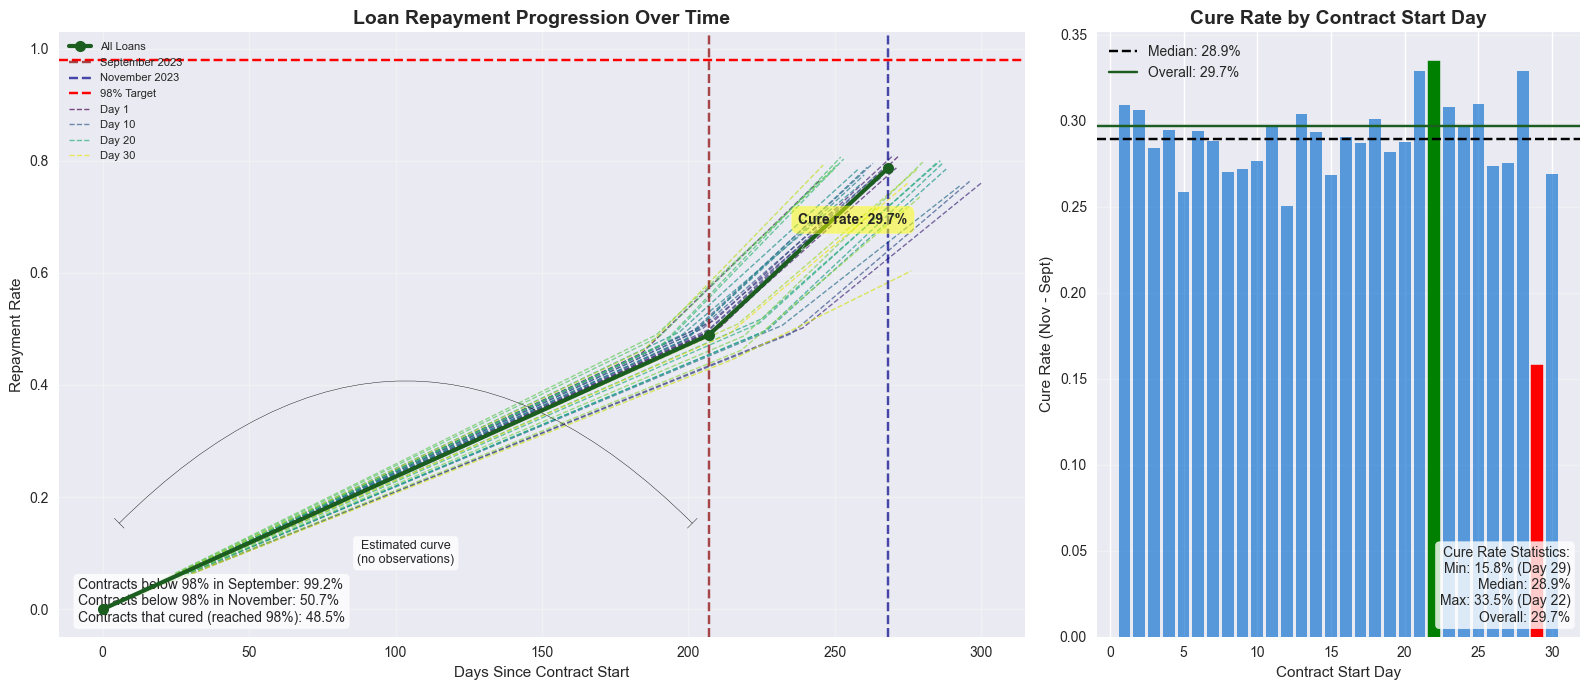

In [ ]:
# Analyze repayment rate curve
fig = analysis.plot_repayment_curve_with_cure_rates(df)
plt.tight_layout()
plt.show()

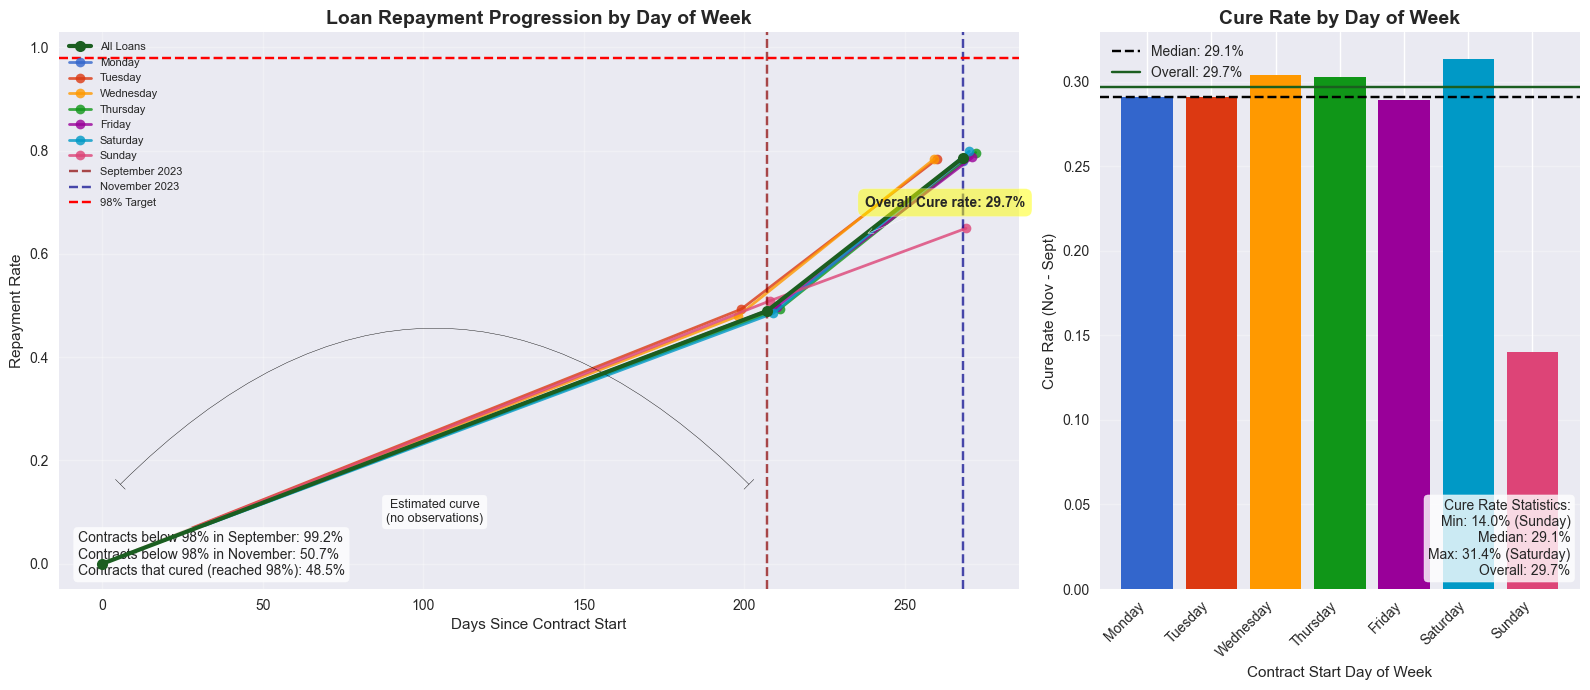

In [29]:
# Analyze repayment rate cure rates by weekday
fig = analysis.plot_repayment_curve_by_weekday(df)
plt.tight_layout()
plt.show()

In [ ]:
# Analyze regional performance with confidence intervals
fig = analysis.plot_regional_performance(df)
plt.tight_layout()
plt.show()

In [ ]:
# Analyze relationship between loan value and repayment rate
fig = analysis.plot_loan_value_repayment(df)
plt.tight_layout()
plt.show()

In [ ]:
# Analyze impact of deposit ratio on repayment performance
fig, stats = analysis.analyze_deposit_ratio(df)
plt.tight_layout()
plt.show()

print("\nDeposit Ratio Statistics:")
print(stats.round(4))

In [ ]:
# Analyze temporal trends in repayment rates
fig, stats = analysis.analyze_temporal_trends(df, n_bins=6)
plt.tight_layout()
plt.show()

print("\nMonthly Performance Statistics:")
print(stats.round(4))

In [ ]:
# Segment clients based on repayment performance
fig, stats = analysis.segment_clients(df)
plt.tight_layout()
plt.show()

print("\nSegment Statistics:")
print(stats.round(4))

In [ ]:
# Analyze geographic patterns in repayment performance
fig, stats = analysis.analyze_geographic_patterns(df)
plt.tight_layout()
plt.show()

print("\nGeographic Performance Statistics:")
print(stats.round(4))